In [1]:
from loss_net_lasagne import Loss_net as Loss_net

Using gpu device 0: Tesla K40m (CNMeM is disabled, cuDNN 5005)
/home/cvlab/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from transfer_lasagne import Slow_style_transfer

In [3]:
import utils

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import seaborn as sns

In [6]:
sns.set_style("white")

In [7]:
import os

In [8]:
cont_path = os.path.join(*("../img/city.jpg").split("/"))

In [9]:
style_path = os.path.join(*("../img/road.jpg").split("/"))

In [10]:
cont = utils.imread(cont_path)

In [11]:
style = utils.imread(style_path)

In [12]:
assert not ( cont is None  and style is None)

In [13]:
loss_net = Loss_net(imshape = cont.shape,model_name = 'vgg19')

In [14]:
loss_net.load_weights(url = 'https://s3.amazonaws.com/lasagne/recipes/pretrained/imagenet/vgg19_normalized.pkl')

../models/vgg19_normalized.pkl alredy downloaded


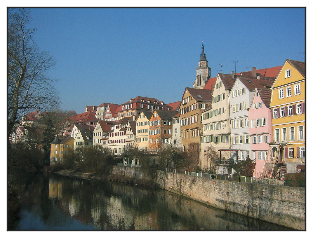

In [15]:
rawim, cont = utils.process_image_vgg(im = cont,
                                       IMAGE_H = loss_net.IMAGE_H,IMAGE_W =loss_net.IMAGE_W)
sns.plt.imshow(rawim[...,::-1])
sns.plt.gca().xaxis.set_visible(False)    
sns.plt.gca().yaxis.set_visible(False)

In [16]:
style_scale = 0.5

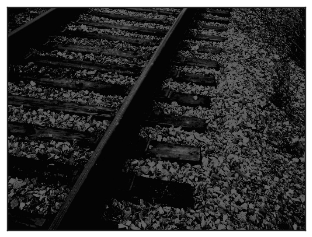

In [17]:
rawim, style = utils.process_image_vgg(
    im = style,IMAGE_H = int(style_scale*loss_net.IMAGE_H),
    IMAGE_W = int(style_scale*loss_net.IMAGE_W))
sns.plt.imshow(rawim)
sns.plt.gca().xaxis.set_visible(False)    
sns.plt.gca().yaxis.set_visible(False)

In [18]:
layers = loss_net.get_layers()

In [19]:
layers_list = [e for e in layers.keys()]

In [20]:
T = Slow_style_transfer(layers = layers,IMAGE_H = loss_net.IMAGE_H,IMAGE_W = loss_net.IMAGE_W,
                                       content = cont, style = style, init_type = 1,gray_only = True)

In [21]:
iterN = 10

In [22]:
xr = T.fit_transform(iterations = iterN)

  0%|          | 0/40 [00:00<?, ?it/s]


iterations : 1/10


  0%|          | 0/40 [00:00<?, ?it/s]


 mean loss per iteration 2804803.18731

iterations : 2/10


  0%|          | 0/40 [00:00<?, ?it/s]


 mean loss per iteration 26031.0378146

iterations : 3/10


  0%|          | 0/40 [00:00<?, ?it/s]


 mean loss per iteration 3842.81345402

iterations : 4/10


  0%|          | 0/40 [00:00<?, ?it/s]


 mean loss per iteration 2173.50150108

iterations : 5/10


  0%|          | 0/40 [00:00<?, ?it/s]


 mean loss per iteration 1543.90641853

iterations : 6/10


  0%|          | 0/40 [00:00<?, ?it/s]


 mean loss per iteration 1178.67598052

iterations : 7/10


  0%|          | 0/40 [00:00<?, ?it/s]


 mean loss per iteration 5539.87812488

iterations : 8/10


  0%|          | 0/40 [00:00<?, ?it/s]


 mean loss per iteration 8445.14243454

iterations : 9/10


  0%|          | 0/40 [00:00<?, ?it/s]


 mean loss per iteration 2296.85900877

iterations : 10/10


100%|##########| 40/40 [00:43<00:00,  1.08s/it]


 mean loss per iteration 2291.99895336


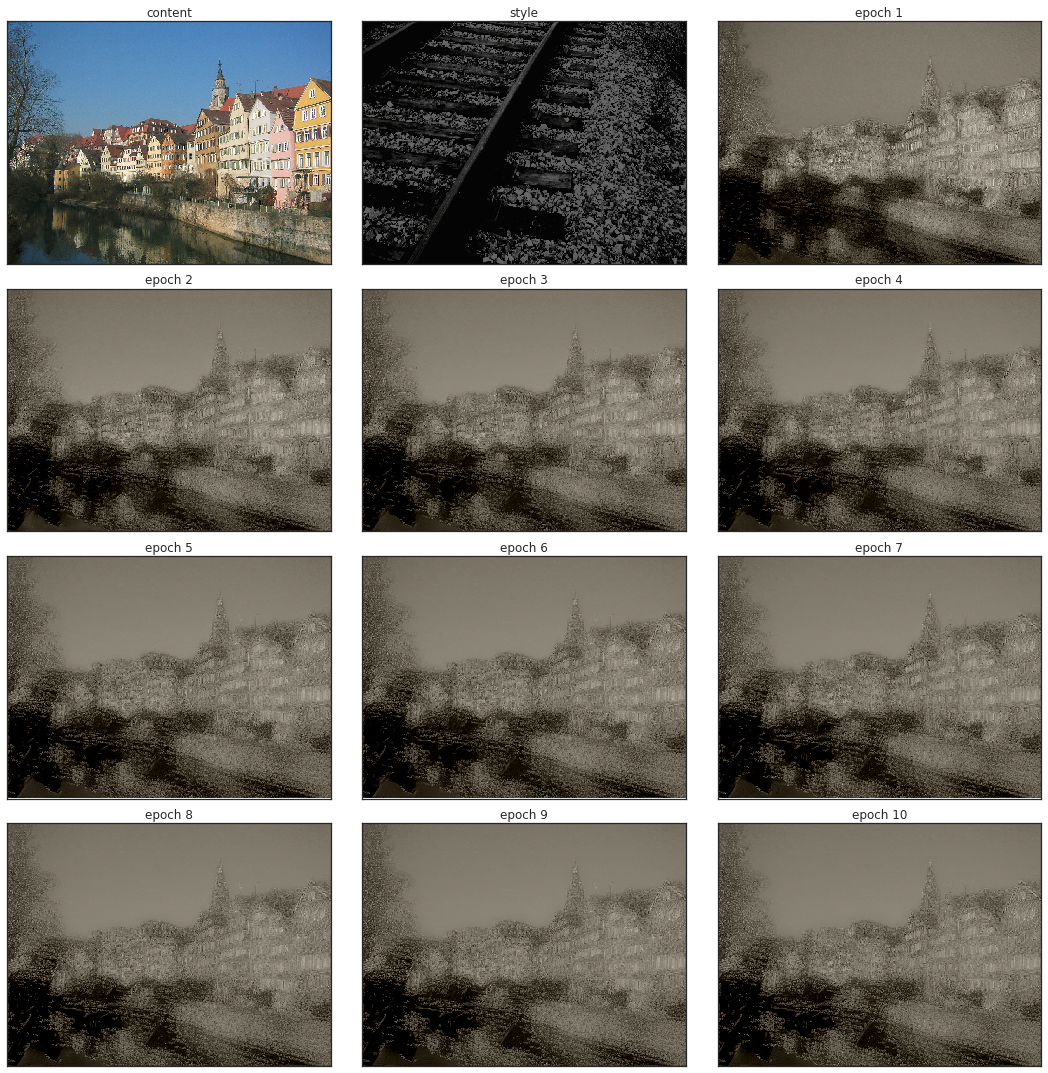

In [27]:
sns.plt.figure(figsize=(15,15))
sns.plt.subplot(4, 3, 1)
j = 0
title("content")
imshow(utils.deprocess_image_vgg(cont), interpolation='nearest')
sns.plt.gca().xaxis.set_visible(False)    
sns.plt.gca().yaxis.set_visible(False)
j+=1

sns.plt.subplot(4, 3, 2)
title('style')
imshow(utils.deprocess_image_vgg(style), interpolation='nearest')
sns.plt.gca().xaxis.set_visible(False)    
sns.plt.gca().yaxis.set_visible(False)
j+=1
for i in arange(1,iterN+1,iterN//10):
    sns.plt.subplot(4, 3, j+1)
    title("epoch %s" % (j+1-2))
    sns.plt.gca().xaxis.set_visible(False)    
    sns.plt.gca().yaxis.set_visible(False)
    imshow(utils.deprocess_image_vgg(xr[i]), interpolation='nearest')
    j+=1
sns.plt.tight_layout()

In [24]:
hist_loss = array(T.hist)

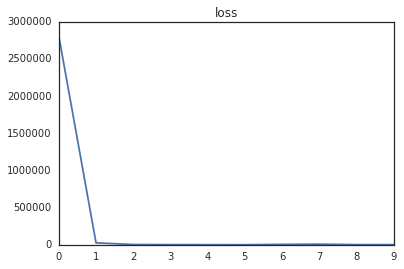

In [25]:
plot(hist_loss,)
title('loss')